In [12]:
import numpy as np

from MacsumAggregationLearning import *
from data_generation import *
from typing import Tuple

import csv
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
N = 2
# C'est le vrai noyau que l'on va essayer de retrouver
phi_true = np.random.uniform(low=-1.0, high=1.0, size=N) 
macsum = Macsum(N,phi_true)
print("True Kernel : ",phi_true)

True Kernel :  [-0.02301093  0.5177945 ]


In [167]:
n_samples=500
X,Y = generate_data(macsum,phi_true,n_samples=n_samples,noise_level=0.1,borne=50,generation="gauss",multi=2)
five_percent = int(n_samples * 0.05)
X_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0)
Y_eval = np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)
X,Y = X[five_percent:-five_percent],Y[five_percent:-five_percent]

assert X.shape[0] == Y.shape[0], f"Shape mismatch: X has {X.shape} rows, Y has {Y.shape} rows"
assert X_eval.shape[0] == Y_eval.shape[0], f"Shape mismatch: X has {X_eval.shape} rows, Y has {Y_eval.shape} rows"

In [ ]:
plot_points_2d(X,group_size=n_samples-five_percent)
plot_points_2d(X_eval,group_size=five_percent)

In [ ]:
macsum =  Macsum(N)
macsum.fit_adam(X,Y,X_eval,Y_eval,n_epochs=500,learning_rate=1e-4,epsilon_conv=1e-5,batch_size=64)
plot_metrics(macsum.history)
evaluate_model(X,Y,macsum)

In [ ]:
macsum_sigmoide =  Macsum_sigmoide(N,alpha=0.1,gamma=0.6,k_sigmoid=0.01)
macsum_sigmoide.fit_adam(X,Y,X_eval,Y_eval,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)
plot_metrics(macsum_sigmoide.history)
evaluate_model(X,Y,macsum_sigmoide)

In [185]:
macsum =  Macsum(N)
macsum.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)

Début de l'entraînement avec l'optimiseur Adam...


Entraînement Adam:  53%|█████▎    | 2650/5000 [05:34<04:56,  7.92it/s]


Convergence atteinte à l'époque 2651, itération 21201.


array([0.65458139, 0.65448583])

In [ ]:
plot_metrics_complet(pd.DataFrame(macsum.history))
evaluate_model_complet(X,Y,macsum)

In [ ]:
macsum_sigmoide =  Macsum_sigmoide(N,alpha=0.1,gamma=0.6,k_sigmoid=0.01)
macsum_sigmoide.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)

In [ ]:
plot_metrics_complet(pd.DataFrame(macsum_sigmoide.history))
evaluate_model_complet(X,Y,macsum_sigmoide)

## Une zone 

In [33]:
n_samples=1000
X,Y = generate_data(macsum,phi_true,n_samples=n_samples,noise_level=0.1,borne=50,generation="gauss",multi=1)
five_percent = int(n_samples * 0.05)
X_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0)
Y_eval = np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)
X,Y = X[five_percent:-five_percent],Y[five_percent:-five_percent]

assert X.shape[0] == Y.shape[0], f"Shape mismatch: X has {X.shape} rows, Y has {Y.shape} rows"
assert X_eval.shape[0] == Y_eval.shape[0], f"Shape mismatch: X has {X_eval.shape} rows, Y has {Y_eval.shape} rows"

In [ ]:
plot_points_2d(X,group_size=n_samples-five_percent)
plot_points_2d(X_eval,group_size=five_percent*2)

In [ ]:
macsum =  Macsum(N)
macsum.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)
plot_metrics_complet(pd.DataFrame(macsum.history))
evaluate_model_complet(X,Y,macsum)

In [ ]:
macsum_sigmoide =  Macsum_sigmoide(N,alpha=0.1,gamma=0.6,k_sigmoid=0.01)
macsum_sigmoide.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)
plot_metrics_complet(pd.DataFrame(macsum_sigmoide.history))
evaluate_model_complet(X,Y,macsum_sigmoide)

### inferer une nouvelle generation

In [35]:
n_samples=1000
X,Y = generate_data(macsum,phi_true,n_samples=n_samples,noise_level=0.1,borne=50,generation="gauss",multi=2)
five_percent = int(n_samples * 0.05)
mid = n_samples
print(mid,X.shape)
X_eval = X[mid:]
Y_eval =  Y[mid:]
X,Y = X[:mid],Y[:mid]

assert X.shape[0] == Y.shape[0], f"Shape mismatch: X has {X.shape} rows, Y has {Y.shape} rows"
assert X_eval.shape[0] == Y_eval.shape[0], f"Shape mismatch: X has {X_eval.shape} rows, Y has {Y_eval.shape} rows"

1000 (2000, 2)


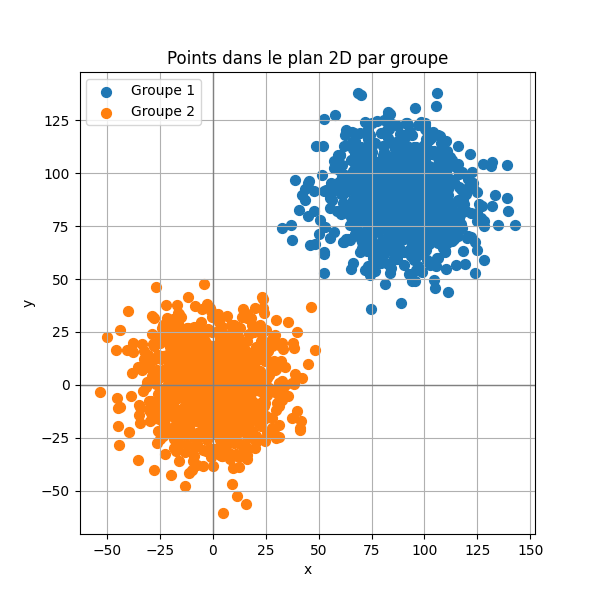

In [41]:
plot_points_2d(np.concatenate([X,X_eval], axis=0),group_size=n_samples)

In [37]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib widget

/var/folders/qy/26d_rwv5383c0fvysb2ywjl40000gn/T/ipykernel_53263/2222033516.py:2: MatplotlibDeprecationWarning:

Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed in 3.10.  To suppress this warning, explicitly call plt.close('all') first.



In [38]:
plot_3d_points(np.concatenate([X,X_eval], axis=0),np.concatenate([Y,Y_eval], axis=0))

Début de l'entraînement avec l'optimiseur Adam...


Entraînement Adam:  85%|████████▌ | 4272/5000 [03:15<00:33, 21.85it/s]



Convergence atteinte à l'époque 4273, itération 34177.


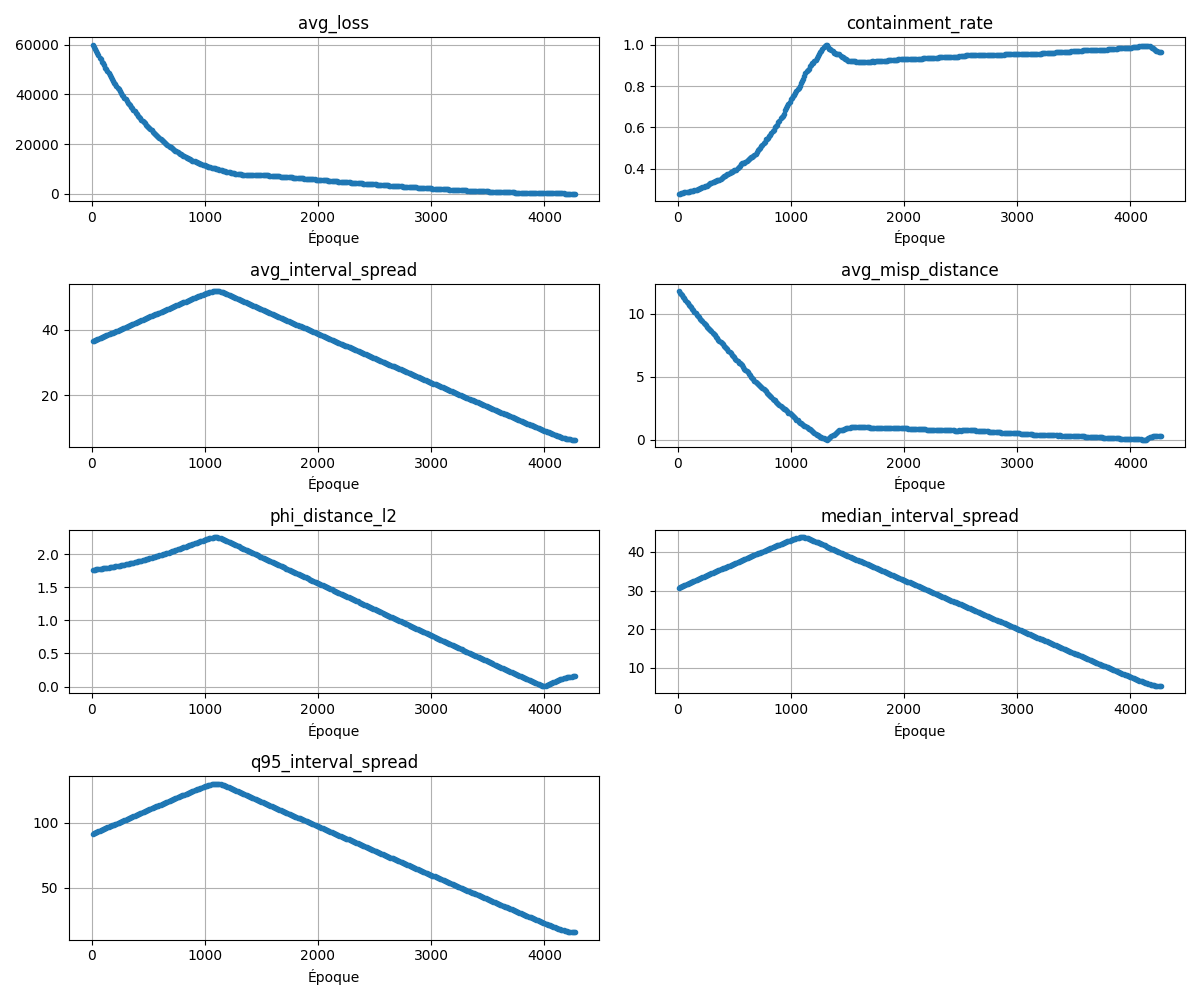

{'containment_rate': 0.943, 'avg_misp_distance': 0.26449792300064257, 'avg_loss': 20.156258523240187, 'avg_interval_spread': 6.494678707891882, 'median_interval_spread': 5.526545081477458, 'q95_interval_spread': 15.815833005668555}
{'containment_rate': 0.964, 'avg_misp_distance': 0.3088836435106136, 'avg_loss': 19.592538232670204, 'avg_interval_spread': 6.300928595721137, 'median_interval_spread': 5.312022798240023, 'q95_interval_spread': 15.805112368371883}


In [39]:
macsum_sigmoide =  Macsum_sigmoide(N,alpha=0.1,gamma=0.6,k_sigmoid=0.01)
macsum_sigmoide.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)
plot_metrics_complet(pd.DataFrame(macsum_sigmoide.history))
print(evaluate_model_complet(X,Y,macsum_sigmoide))
print(evaluate_model_complet(X_eval,Y_eval,macsum_sigmoide))

Début de l'entraînement avec l'optimiseur Adam...


Entraînement Adam:  73%|███████▎  | 3663/5000 [02:32<00:55, 23.96it/s]



Convergence atteinte à l'époque 3664, itération 29309.


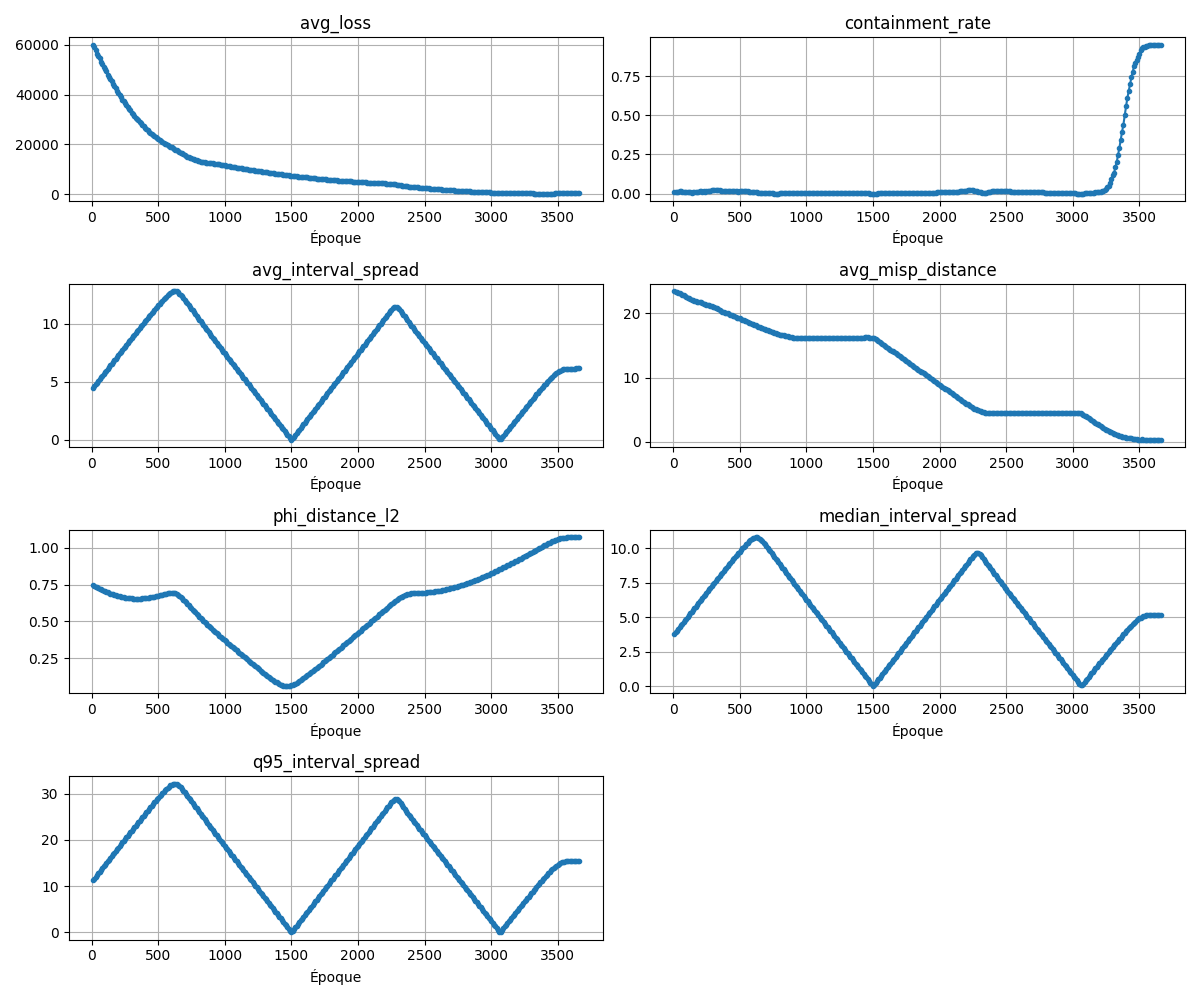

{'containment_rate': 0.929, 'avg_misp_distance': 0.3130235360534893, 'avg_loss': 41.46569565281557, 'avg_interval_spread': 6.340474031409381, 'median_interval_spread': 5.395327028254965, 'q95_interval_spread': 15.440313981305298}
{'containment_rate': 0.951, 'avg_misp_distance': 0.3478924221874313, 'avg_loss': 40.35628733092749, 'avg_interval_spread': 6.151324173494391, 'median_interval_spread': 5.185898197792135, 'q95_interval_spread': 15.429847886608869}


In [47]:
macsum =  Macsum(N)
macsum.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)
plot_metrics_complet(pd.DataFrame(macsum.history))
print(evaluate_model_complet(X,Y,macsum))
print(evaluate_model_complet(X_eval,Y_eval,macsum))

In [54]:
new_X = np.concatenate([X,X_eval], axis=0)
new_Y = np.zeros(new_X.shape[0])
generateur = Macsum(2,macsum.phi)
for i in range(new_X.shape[0]):
    y_bot,y_top =  generateur.prediction(new_X[i])
    new_Y[i] = ( y_bot+y_top ) /2
    
plot_3d_points(new_X,new_Y)

### Tolérance au perte d'information

In [55]:
N = 3
# C'est le vrai noyau que l'on va essayer de retrouver
phi_true = np.random.uniform(low=-1.0, high=1.0, size=N) 
macsum = Macsum(N,phi_true)
print("True Kernel : ",phi_true)

True Kernel :  [ 0.34818806 -0.79905463 -0.98899855]


In [56]:
n_samples=1000
X,Y = generate_data(macsum,phi_true,n_samples=n_samples,noise_level=0.1,borne=50,generation="gauss",multi=1)
five_percent = int(n_samples * 0.05)
X_eval = np.concatenate([X[:five_percent], X[-five_percent:]], axis=0)
Y_eval = np.concatenate([Y[:five_percent], Y[-five_percent:]], axis=0)
X,Y = X[five_percent:-five_percent],Y[five_percent:-five_percent]

assert X.shape[0] == Y.shape[0], f"Shape mismatch: X has {X.shape} rows, Y has {Y.shape} rows"
assert X_eval.shape[0] == Y_eval.shape[0], f"Shape mismatch: X has {X_eval.shape} rows, Y has {Y_eval.shape} rows"

In [58]:
macsum_sigmoide =  Macsum_sigmoide(N,alpha=0.1,gamma=0.6,k_sigmoid=0.01)
macsum_sigmoide.fit_adam_complet(X,Y,X_eval,Y_eval,phi_true,n_epochs=5000,learning_rate=1e-4,epsilon_conv=1e-6,batch_size=128,beta1=0.7,beta2=0.99)

Début de l'entraînement avec l'optimiseur Adam...


Entraînement Adam:  80%|███████▉  | 3989/5000 [02:40<00:40, 24.83it/s]


Convergence atteinte à l'époque 3990, itération 31917.


array([ 0.32020069, -0.67201146, -0.67208123])

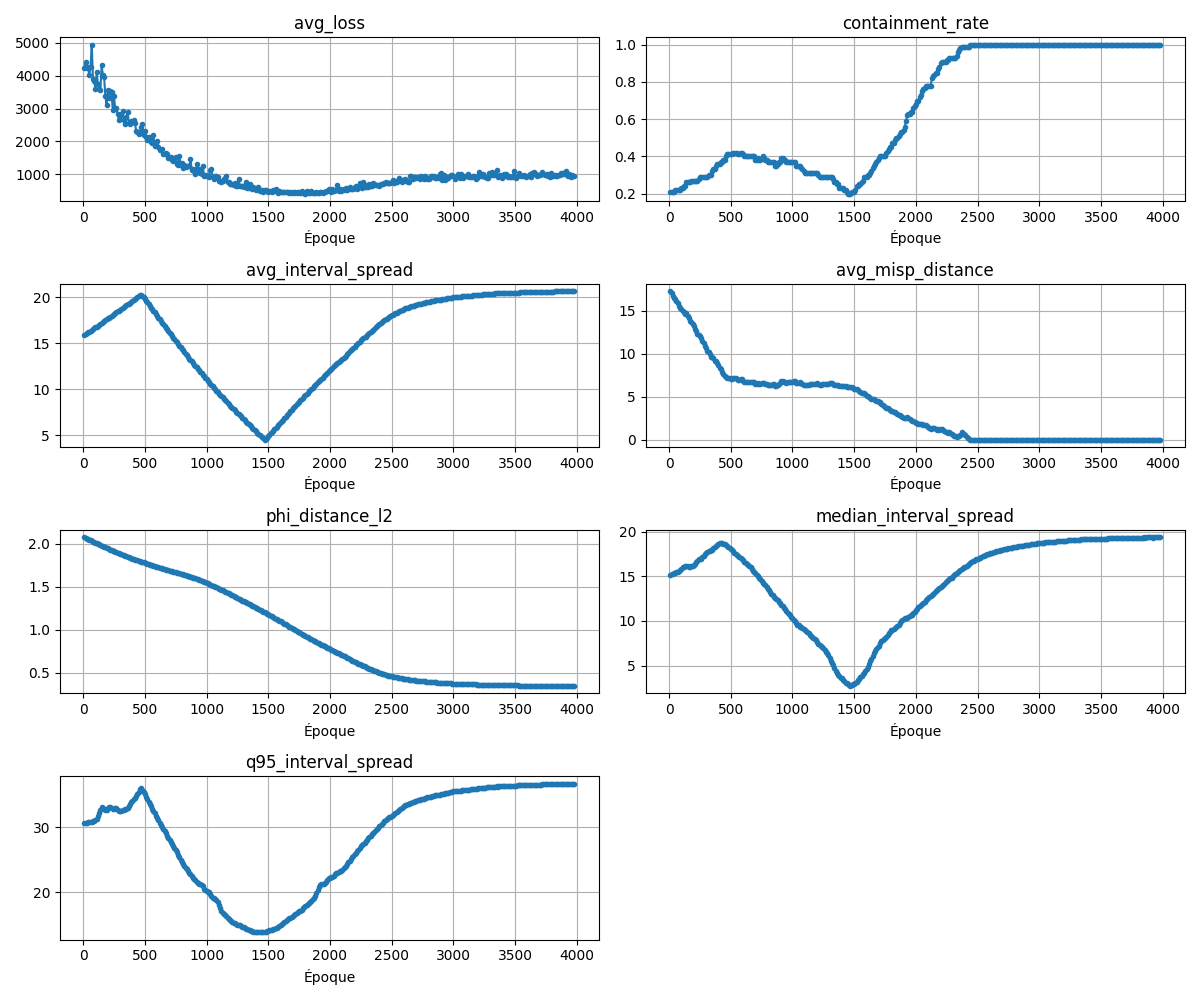

{'containment_rate': 0.9933333333333333, 'avg_misp_distance': 0.8653487292938665, 'avg_loss': 122.54996526867384, 'avg_interval_spread': 19.095681878139228, 'median_interval_spread': 17.827039157499414, 'q95_interval_spread': 38.51238084852819}
{'containment_rate': 1.0, 'avg_misp_distance': 0.0, 'avg_loss': 138.7038496456016, 'avg_interval_spread': 20.69081466552801, 'median_interval_spread': 19.379376218587517, 'q95_interval_spread': 36.75031348061472}


In [59]:
plot_metrics_complet(pd.DataFrame(macsum_sigmoide.history))
print(evaluate_model_complet(X,Y,macsum_sigmoide))
print(evaluate_model_complet(X_eval,Y_eval,macsum_sigmoide))

In [101]:
tmp_phi = phi_true #macsum_sigmoide.phi
print(tmp_phi)

[ 0.34818806 -0.79905463 -0.98899855]


In [102]:
X_gaps = X[:,1:]
phi_gaps = tmp_phi[1:] #macsum_sigmoide.phi[1:]
print(phi_gaps)
macsum_gaps = Macsum(2,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))

[-0.79905463 -0.98899855]
{'containment_rate': 0.3988888888888889, 'avg_misp_distance': 10.381676787600151, 'avg_loss': 771.8154381459016, 'avg_interval_spread': 18.475944391081523, 'median_interval_spread': 15.299635013779167, 'q95_interval_spread': 46.71988489844081}
-0.20829572498018392


In [103]:
X_gaps = X[:,:-1]
phi_gaps = tmp_phi[:-1]
print(phi_gaps)
macsum_gaps = Macsum(2,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))

[ 0.34818806 -0.79905463]
{'containment_rate': 0.6388888888888888, 'avg_misp_distance': 6.319734934002624, 'avg_loss': 302.97904916955326, 'avg_interval_spread': 15.457302131948554, 'median_interval_spread': 12.586326893876993, 'q95_interval_spread': 39.08221430323569}
-0.20829572498018392


In [104]:
X_gaps = X[:,[0, -1]]
phi_gaps = tmp_phi[[0, -1]]
macsum_gaps = Macsum(2,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))
print(phi_gaps)

{'containment_rate': 0.72, 'avg_misp_distance': 5.058241732291227, 'avg_loss': 349.2123896254977, 'avg_interval_spread': 18.59671276355661, 'median_interval_spread': 16.3408728162416, 'q95_interval_spread': 45.492762879029094}
-0.20829572498018392
[ 0.34818806 -0.98899855]


In [108]:
X_gaps = X[:,[0]]
phi_gaps = tmp_phi[[0]]
macsum_gaps = Macsum(1,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))
print(phi_gaps)

{'containment_rate': 0.0, 'avg_misp_distance': 9.927477811794034, 'avg_loss': 294.70055559105145, 'avg_interval_spread': 0.0, 'median_interval_spread': 0.0, 'q95_interval_spread': 0.0}
-0.20829572498018392
[0.34818806]


In [113]:
tmp_phi = macsum_sigmoide.phi

In [114]:
X_gaps = X[:,1:]
phi_gaps = tmp_phi[1:] #macsum_sigmoide.phi[1:]
print(phi_gaps)
macsum_gaps = Macsum(2,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))

[-0.67201146 -0.67208123]
{'containment_rate': 0.3055555555555556, 'avg_misp_distance': 10.83768567230768, 'avg_loss': 608.9224007445297, 'avg_interval_spread': 12.555463681220973, 'median_interval_spread': 10.396979319994395, 'q95_interval_spread': 31.74884085039513}
-0.20829572498018392


In [115]:
X_gaps = X[:,:-1]
phi_gaps = tmp_phi[:-1]
print(phi_gaps)
macsum_gaps = Macsum(2,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))

[ 0.32020069 -0.67201146]
{'containment_rate': 0.6044444444444445, 'avg_misp_distance': 6.550490754121189, 'avg_loss': 257.9011479250197, 'avg_interval_spread': 12.99971703136839, 'median_interval_spread': 10.585203464873782, 'q95_interval_spread': 32.86846065143946}
-0.20829572498018392


In [116]:
X_gaps = X[:,[0, -1]]
phi_gaps = tmp_phi[[0, -1]]
macsum_gaps = Macsum(2,phi_gaps)
print(evaluate_model_complet(X_gaps,Y,macsum_gaps))
print(np.mean(Y))
print(phi_gaps)

{'containment_rate': 0.6266666666666667, 'avg_misp_distance': 5.332379688884824, 'avg_loss': 222.84613832474528, 'avg_interval_spread': 12.63753271554774, 'median_interval_spread': 11.104560114545928, 'q95_interval_spread': 30.914941071253793}
-0.20829572498018392
[ 0.32020069 -0.67208123]
